In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_utils import *
import cifar10_DNN

Using TensorFlow backend.


cifar10_DNN모듈을 사용한다

원래 이미지 데이터

In [2]:
(X_train_origin, Y_train_origin), (X_test_origin, Y_test_origin) = cifar10_DNN.datasets.cifar10.load_data()

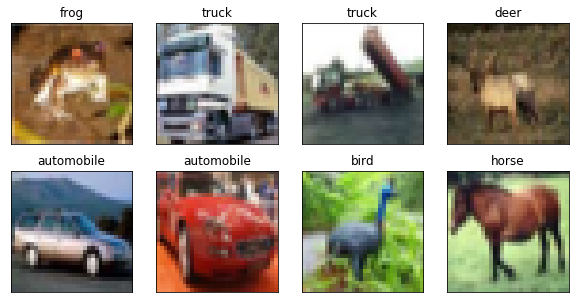

In [3]:
show_images(X_train_origin, Y_train_origin, 8)

pre-processing된 데이터 load

In [4]:
(X_train, Y_train), (X_test, Y_test) = cifar10_data_load(cifar10_DNN.datasets.cifar10)

Data type changed to float32, label type changed to categorical
Normalize Data


In [5]:
cifar_model = cifar10_DNN.CifarDNN(img_shape = X_train.shape[1], class_num = Y_train.shape[1])

모델 펼처보기

In [6]:
cifar_model.show_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer1 (Dense)         (None, 32)                98336     
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 64)                2112      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
__________

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 5s 121us/step - loss: 2.0029 - acc: 0.2907 - val_loss: 1.7638 - val_acc: 0.3734

Epoch 00001: val_loss improved from inf to 1.76380, saving model to ./save_model/model/2019-04-28_14h09m06s/01-1.7638-0.2907.hd5
Epoch 2/2
40000/40000 [==============================] - 4s 97us/step - loss: 1.7923 - acc: 0.3589 - val_loss: 1.6771 - val_acc: 0.4138

Epoch 00002: val_loss improved from 1.76380 to 1.67714, saving model to ./save_model/model/2019-04-28_14h09m06s/02-1.6771-0.3589.hd5
10000/10000 [==============================] - 0s 30us/step
Test Loss :  1.6528836359024048
Test Accuracy :  0.4208
Test Loss :  1.6528836359024048
Test Accuracy :  42.08 %
predict class :  [3 9 8]
actual class :  [3 8 8]


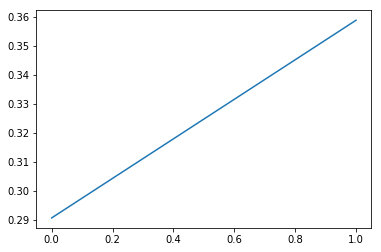

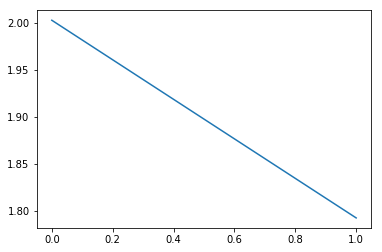

In [7]:
history_train = cifar_model.train(X_train, Y_train, 2, 32, 0.2)

#  model evaluate
result = cifar_model.show_eval(X_test, Y_test, 32)
print('Test Loss : ', result[0])
print('Test Accuracy : ', result[1]*100, '%')

print('predict class : ',cifar_model.model.predict_classes(X_test[:3]))
print('actual class : ', np.where(Y_test[:3])[1])

In [8]:
print('predict class : ',cifar_model.model.predict_classes(X_test[:3]))

predict class :  [3 9 8]


In [9]:
print('predict class : ',cifar_model.predict(X_test[:3]))

predict class :  [3 9 8]


In [10]:
prediction = cifar_model.predict(X_test)

In [11]:
print(Y_test_origin[:8])
print(prediction[:8])

[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]]
[3 9 8 8 4 6 3 6]


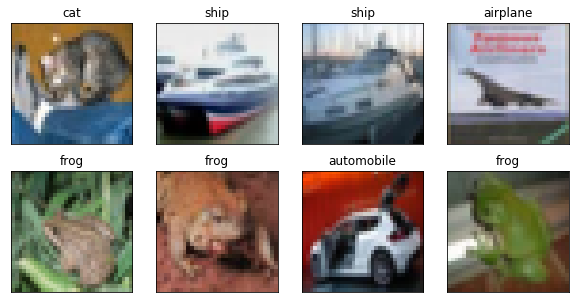

In [12]:
show_images(X_test_origin, Y_test_origin, 8)

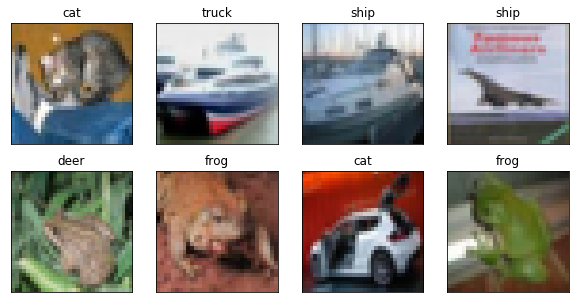

In [13]:
show_images(X_test_origin, prediction, 8)

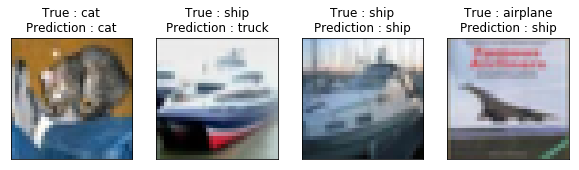

In [14]:
show_images_compare(X_test_origin, Y_test_origin, prediction)

In [15]:
result = cifar_model.show_eval(X_test, Y_test, 32)

10000/10000 [==============================] - 0s 30us/step
Test Loss :  1.6528836359024048
Test Accuracy :  0.4208


In [16]:
print('predict class : ',cifar_model.model.predict(X_test[:3]))

predict class :  [[1.0494300e-01 1.0395110e-01 1.2114149e-01 1.5673144e-01 7.9248548e-02
  1.3144127e-01 5.9874851e-02 6.4021610e-02 1.2697841e-01 5.1668257e-02]
 [8.6523779e-02 2.1930313e-01 1.5079112e-03 2.7877958e-03 1.9640548e-03
  7.0235896e-04 1.5538774e-03 2.2212577e-03 2.4854003e-01 4.3489581e-01]
 [1.3474113e-01 7.0029505e-02 3.0097535e-03 2.2982284e-03 1.0564085e-03
  1.4102597e-03 1.7481398e-04 6.9515877e-03 5.8348101e-01 1.9684726e-01]]


In [17]:
print('predict class : ',cifar_model.model.predict_classes(X_test[:3]))

predict class :  [3 9 8]


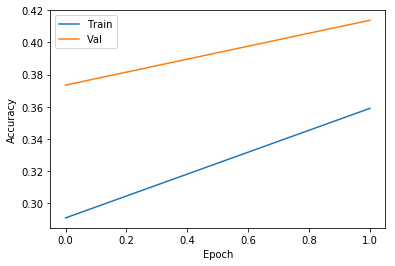

In [18]:
cifar10_DNN.plot_acc(history_train)

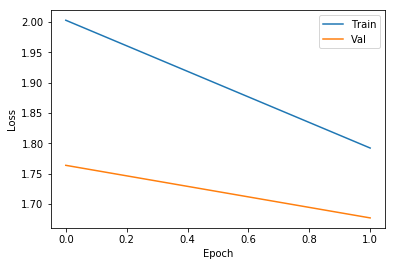

In [19]:
cifar10_DNN.plot_loss(history_train)

In [20]:
history_train.history['acc'][-1]

0.358925

In [21]:
prediction = cifar_model.model.predict(X_test)
Y_prediction = np.argmax(prediction, axis=1)

# label shape is digit
print(confusion_mat(Y_test_origin, Y_prediction))

[[482  46  27   8  27  11  38  67 229  65]
 [ 42 541  10  36  11  16  55  40 110 139]
 [139  29 138  83 170  49 216 106  41  29]
 [ 53  22  45 246  75 150 213  89  64  43]
 [ 49  13  56  43 380  39 227 129  38  26]
 [ 32  17  69 156  69 278 144 114  96  25]
 [ 16  16  28  54 137  57 599  57  16  20]
 [ 40  22  23  76 104  65  72 487  41  70]
 [112  78   9  17  14  19  19  20 625  87]
 [ 36 205   9  33  15  18  65  58 129 432]]


In [22]:
print(confusion_report(Y_test_origin, Y_prediction))

              precision    recall  f1-score   support

           0       0.48      0.48      0.48      1000
           1       0.55      0.54      0.54      1000
           2       0.33      0.14      0.20      1000
           3       0.33      0.25      0.28      1000
           4       0.38      0.38      0.38      1000
           5       0.40      0.28      0.33      1000
           6       0.36      0.60      0.45      1000
           7       0.42      0.49      0.45      1000
           8       0.45      0.62      0.52      1000
           9       0.46      0.43      0.45      1000

   micro avg       0.42      0.42      0.42     10000
   macro avg       0.42      0.42      0.41     10000
weighted avg       0.42      0.42      0.41     10000



In [23]:
np.unique(Y_test_origin)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])